In [1]:
# 📦 Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 🎲 Simulate A/B Test Dataset
np.random.seed(42)
n_users = 2000
data = pd.DataFrame({
    'user_id': np.arange(1, n_users + 1),
    'group': np.where(np.random.rand(n_users) < 0.5, 'A', 'B'),
    'revenue': 0.0
})

# 🎯 Assign revenue to converted users
a_mask = (data['group'] == 'A') & (np.random.rand(n_users) < 0.10)
b_mask = (data['group'] == 'B') & (np.random.rand(n_users) < 0.15)
data.loc[a_mask, 'revenue'] = np.random.uniform(10, 100, size=a_mask.sum()).round(2)
data.loc[b_mask, 'revenue'] = np.random.uniform(10, 120, size=b_mask.sum()).round(2)
data['converted'] = data['revenue'] > 0


In [2]:
# 🔍 Split into groups
control = data[data['group'] == 'A']
variant = data[data['group'] == 'B']

# 📊 Compute metrics
control_cr = control['converted'].mean()
variant_cr = variant['converted'].mean()
control_avg_rev = control['revenue'].mean()
variant_avg_rev = variant['revenue'].mean()

# 📏 Z-Test (for conversion rate)
n1, n2 = len(control), len(variant)
p1, p2 = control_cr, variant_cr
p_pool = (control['converted'].sum() + variant['converted'].sum()) / (n1 + n2)
z_score = (p1 - p2) / np.sqrt(p_pool * (1 - p_pool) * (1/n1 + 1/n2))
p_value = stats.norm.sf(abs(z_score)) * 2

# 📐 T-Test (for revenue)
t_stat, t_p_value = stats.ttest_ind(control['revenue'], variant['revenue'])


C:\Users\Complap\AppData\Local\Temp\ipykernel_12104\532456175.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Control (A)', 'Variant (B)'], y=[control_cr, variant_cr], palette='pastel')
C:\Users\Complap\AppData\Local\Temp\ipykernel_12104\532456175.py:10: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Complap\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


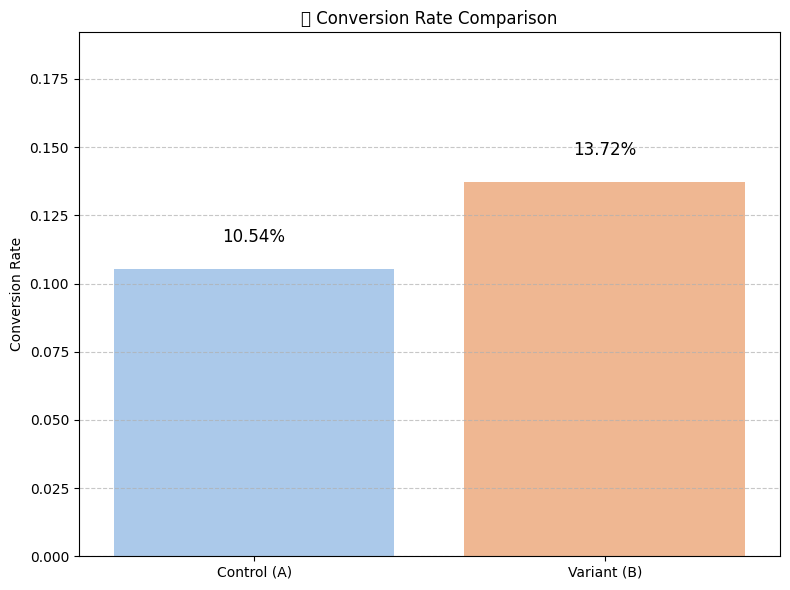

C:\Users\Complap\AppData\Local\Temp\ipykernel_12104\532456175.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Control (A)', 'Variant (B)'], y=[control_avg_rev, variant_avg_rev], palette='Set2')
C:\Users\Complap\AppData\Local\Temp\ipykernel_12104\532456175.py:22: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Complap\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


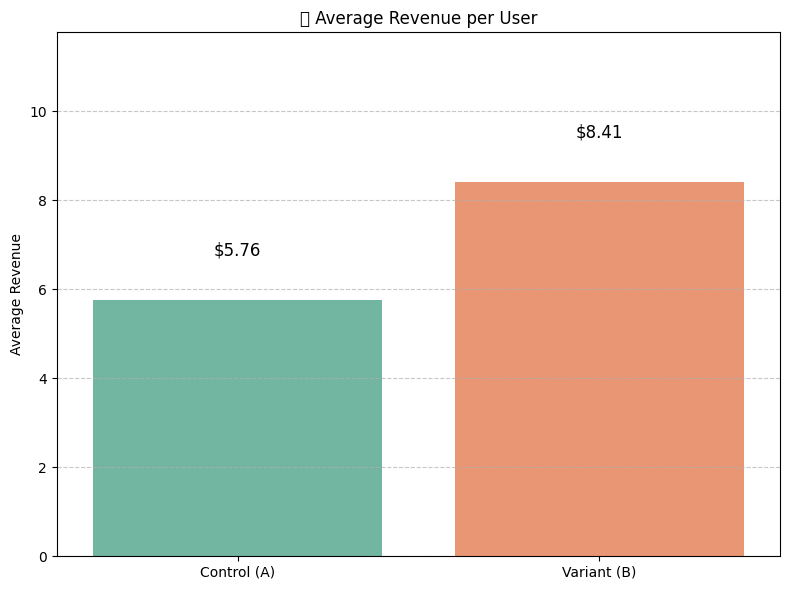

In [3]:
# 🖼️ Plot 1: Conversion Rate Comparison
plt.figure(figsize=(8, 6))
sns.barplot(x=['Control (A)', 'Variant (B)'], y=[control_cr, variant_cr], palette='pastel')
plt.title('🔍 Conversion Rate Comparison')
plt.ylabel('Conversion Rate')
plt.ylim(0, max(control_cr, variant_cr)*1.4)
plt.text(0, control_cr + 0.01, f"{control_cr:.2%}", ha='center', fontsize=12)
plt.text(1, variant_cr + 0.01, f"{variant_cr:.2%}", ha='center', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 🖼️ Plot 2: Average Revenue Comparison
plt.figure(figsize=(8, 6))
sns.barplot(x=['Control (A)', 'Variant (B)'], y=[control_avg_rev, variant_avg_rev], palette='Set2')
plt.title('💰 Average Revenue per User')
plt.ylabel('Average Revenue')
plt.ylim(0, max(control_avg_rev, variant_avg_rev)*1.4)
plt.text(0, control_avg_rev + 1, f"${control_avg_rev:.2f}", ha='center', fontsize=12)
plt.text(1, variant_avg_rev + 1, f"${variant_avg_rev:.2f}", ha='center', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [4]:
# 📋 Display final test results
summary = {
    "Conversion Rate (Control A)": f"{control_cr:.2%}",
    "Conversion Rate (Variant B)": f"{variant_cr:.2%}",
    "Z-Score": round(z_score, 4),
    "P-Value (Conversion Rate)": round(p_value, 4),
    "Average Revenue (Control A)": round(control_avg_rev, 2),
    "Average Revenue (Variant B)": round(variant_avg_rev, 2),
    "T-Statistic (Revenue)": round(t_stat, 4),
    "P-Value (Revenue)": round(t_p_value, 4)
}
for k, v in summary.items():
    print(f"{k}: {v}")


Conversion Rate (Control A): 10.54%
Conversion Rate (Variant B): 13.72%
Z-Score: -2.1795
P-Value (Conversion Rate): 0.0293
Average Revenue (Control A): 5.76
Average Revenue (Variant B): 8.41
T-Statistic (Revenue): -2.7169
P-Value (Revenue): 0.0066
